## Pre-lecture hw

Link to chatbot code:

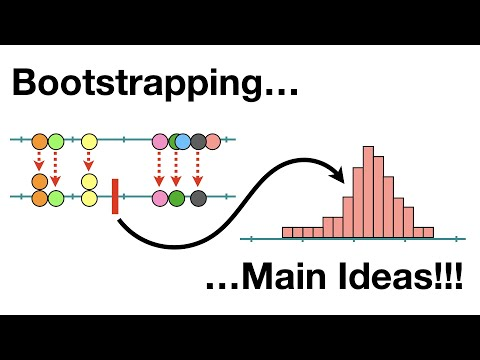

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

### 1.

Standard deviation (SD) measures the variability of the individual data points in the sample. It reflects how spread out the data points are around the sample mean.

Standard error of the mean (SEM), on the other hand, measures the variability of the sample mean if we were to repeatedly sample from the population. Specifically, it tells us how much the sample mean is likely to vary from sample to sample.

SEM is usually smaller than the SD because averaging tends to reduce variability. So, while SD reflects the spread of the raw data, SEM reflects the uncertainty in the estimate of the population mean based on the sample.

### 2.

To create a 95% confidence interval that covers 95% of the bootstrapped sample means using the standard error of the mean:

1. Calculate the Sample Mean: Find the mean of your original data sample.
2. Bootstrap the Sample: Resample your data with replacement many times (typically thousands of times) to generate a distribution of bootstrapped sample means.
3. Calculate the Bootstrapped Sample Means: For each bootstrap sample, calculate the mean, resulting in a set of bootstrapped sample means.
4. Determine the Standard Error of the Mean: Calculate the standard deviation of these bootstrapped sample means, which is basically the SEM.
5. Find the Percentiles: Find the 2.5th percentile and the 97.5th percentile of the bootstrapped sample means. These percentiles are the lower and upper bounds of your confidence interval.
6. Construct the Confidence Interval: The 95% confidence interval is given by the values at the 2.5th and 97.5th percentiles of the bootstrapped sample means. This interval captures the range within which we expect 95% of the bootstrapped means to lie.

### 3.

To create a 95% bootstrapped confidence interval using the bootstrapped means directly:
1. Bootstrap the Sample: Resample the original data with replacement a thousand times to create a distribution of bootstrapped sample means.
2. Calculate Bootstrapped Means: For each bootstrap sample, calculate the mean, resulting in a set of bootstrapped means.
3. Sort the Bootstrapped Means: Arrange the bootstrapped means in ascending order.
4. Determine Percentiles: Find the 2.5th percentile and the 97.5th percentile from the sorted list of bootstrapped means. These values are the bounds of the confidence interval.
5. Construct the Confidence Interval: The 95% confidence interval is defined as the range between the 2.5th and 97.5th percentiles of the bootstrapped means. This interval captures the central 95% of the bootstrapped means directly.

### 4.

95% Bootstrapped Confidence Interval for the Mean: (3.7, 7.2)


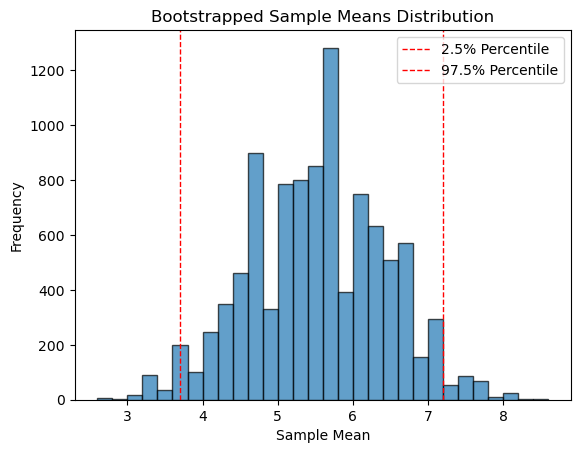

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Original sample data
sample = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Number of bootstrap iterations
n_iterations = 10000
# Length of the sample
n = len(sample)

# Initialize an array to store the bootstrapped means
bootstrapped_means = np.empty(n_iterations)

# Bootstrapping process
for i in range(n_iterations):
    # Create a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrapped_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval using the percentile method
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Print the 95% confidence interval for the population mean
print(f"95% Bootstrapped Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

# Visualizing the distribution of bootstrapped means
plt.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='2.5% Percentile')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='97.5% Percentile')
plt.title('Bootstrapped Sample Means Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Modifying for Different Parameters
To compute a bootstrap confidence interval for the population median instead of the mean:
- Comment out the part of the code that calculates the mean (bootstrapped_means[i] = np.mean(bootstrap_sample)).
- Uncomment the section that calculates the median (bootstrapped_medians[i] = np.median(bootstrap_sample)).
- Use the bootstrapped_medians array to calculate the confidence interval.

95% Bootstrapped Confidence Interval for the Median: (3.0, 8.0)


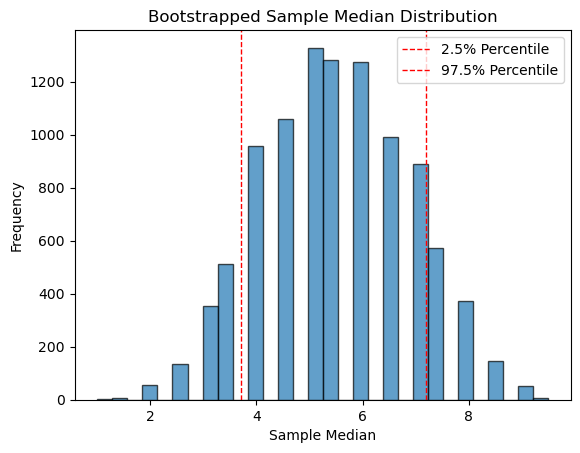

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Original sample data
sample = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Number of bootstrap iterations
n_iterations = 10000
# Length of the sample
n = len(sample)

# Initialize an array to store the bootstrapped medians
bootstrapped_medians = np.empty(n_iterations)

# Bootstrapping process for median
for i in range(n_iterations):
    # Create a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    # Calculate the median of the bootstrap sample
    bootstrapped_medians[i] = np.median(bootstrap_sample)


# Calculate the 95% confidence interval using the percentile method for the median
lower_bound_median = np.percentile(bootstrapped_medians, 2.5)
upper_bound_median = np.percentile(bootstrapped_medians, 97.5)

# Print the 95% confidence interval for the population median
print(f"95% Bootstrapped Confidence Interval for the Median: ({lower_bound_median}, {upper_bound_median})")

# Visualizing the distribution of bootstrapped means
plt.hist(bootstrapped_medians, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='2.5% Percentile')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='97.5% Percentile')
plt.title('Bootstrapped Sample Median Distribution')
plt.xlabel('Sample Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Post-lecture hw

### 5.

Why we need to distinguish between the population parameter and the sample statistic when discussing confidence intervals:

- The population parameter is a fixed value that describes a characteristic of the entire population.However, it is usually unknown and cannot be directly measured.
- Sample statistic is calculated from a sample taken from the population. It serves as an estimate of the population parameter.
- ample statistics can vary from sample to sample due to sampling variability. Confidence intervals help quantify this uncertainty by providing a range within which we expect the population parameter to lie, based on the observed sample statistic.
- The goal of constructing confidence intervals is to make inferences about the population parameter using the sample statistic. Recognizing the distinction allows us to interpret the confidence interval correctly. It's not about the sample statistic itself, but about estimating the unknown population parameter.

### 6.

1. What is the process of bootstrapping?

So, bootstrapping is like taking a sneak peek at how the population might behave using just a sample of data. Imagine you’ve got a small bag of candy (the sample), and you want to figure out what the whole candy jar (the population) is like without looking inside.

You start with your original sample of data and create lots of new samples from your original sample by picking candies out of the bag with replacement. This means after you pick a candy, you put it back before picking again. So, you might pick the same candy multiple times. For each of these new samples, you calculate a statistic, like the mean (average) or median. You do this thousands of times, which gives you a whole bunch of new "means" or "medians" that reflect the possible outcomes if you kept sampling.

2. What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to help us understand the uncertainty around our estimates. When we calculate something like an average from a sample, we want to know how reliable that average is. So, instead of just taking our single sample average at face value, we use bootstrapping to see how much it might change if we collected more samples. 

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Let’s say you’ve made a guess about the average of a population-50.

How you can use bootstrapping to assess your guess:
Start with Your Sample. Resample.For each of these bootstrap samples, calculate the mean. Now that you’ve got a whole bunch of means, it gives you a distribution of possible averages based on your sample. Finally, see where your guessed average of 50 falls within this distribution. If 50 is within the range of most of the bootstrapped means, that suggests your guess might be plausible. But if it’s way outside the range, it could mean that your guess is off.

### 7.

1. Why does a confidence interval overlapping zero "fail to reject the null hypothesis"?

The null hypothesis states that there is no effect in the population, which in this case means the drug has no effect on average. This is often represented as a mean difference of zero. A confidence interval that overlaps zero suggests that it’s possible that the true population mean could actually be zero because of which we lack sufficient evidence to reject the null hypothesis. We can’t confidently assert that the drug has a significant effect because there is a possibility that it does not.

2. What would lead to rejecting the null hypothesis?

If the sample mean is far from zero and the confidence interval is completely above or below zero, it suggests that the effect is  significant. For example, if the confidence interval ranges from 1 to 3, it implies the drug has a positive effect. A narrower confidence interval indicates more precise estimates of the effect, which could occur with a larger sample size or a stronger effect. If this interval does not include zero, it strengthens the case for rejecting the null hypothesis.

### 8.

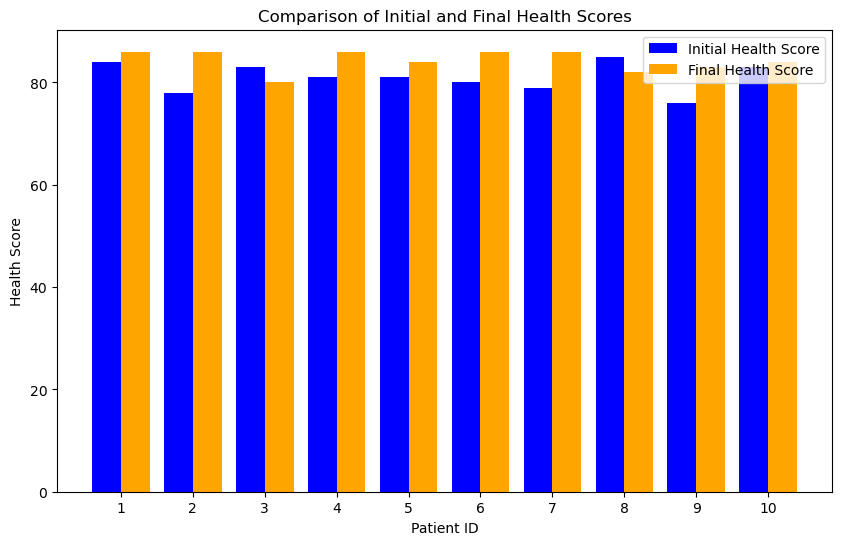

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

plt.figure(figsize=(10, 6))
plt.bar(data['PatientID'] - 0.2, data['InitialHealthScore'], width=0.4, label='Initial Health Score', color='blue')
plt.bar(data['PatientID'] + 0.2, data['FinalHealthScore'], width=0.4, label='Final Health Score', color='orange')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.xticks(data['PatientID'])
plt.legend()
plt.show()

95% Bootstrap Confidence Interval for Health Score Change: (0.90, 5.50)


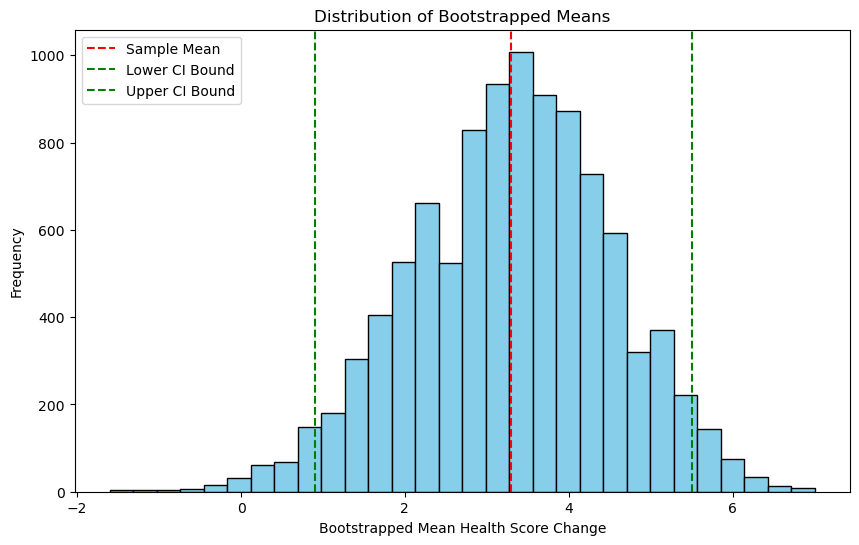

In [44]:
import numpy as np

def bootstrap_confidence_interval(data, num_bootstraps=10000, alpha=0.05):
    bootstrapped_means = []
    n = len(data)

    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrapped_means.append(np.mean(sample))

    lower_bound = np.percentile(bootstrapped_means, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrapped_means, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound

health_score_changes = data['HealthScoreChange'].values
ci_lower, ci_upper = bootstrap_confidence_interval(health_score_changes)

print(f"95% Bootstrap Confidence Interval for Health Score Change: ({ci_lower:.2f}, {ci_upper:.2f})")

bootstrapped_means = []

for _ in range(10000):
    sample = np.random.choice(health_score_changes, size=len(health_score_changes), replace=True)
    bootstrapped_means.append(np.mean(sample))

plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=mean_change, color='red', linestyle='--', label='Sample Mean')
plt.axvline(x=ci_lower, color='green', linestyle='--', label='Lower CI Bound')
plt.axvline(x=ci_upper, color='green', linestyle='--', label='Upper CI Bound')
plt.title('Distribution of Bootstrapped Means')
plt.xlabel('Bootstrapped Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Vaccine Data Analysis Report

###### Problem Introduction
The aim of this analysis is to evaluate the effectiveness of a new vaccine developed by AliTech. The company claims that the vaccine improves the health of individuals who take it. To assess this claim, we will analyze the health scores of patients before and after receiving the vaccine, using statistical methods to determine if the observed changes in health scores are significant.

In the context of this analysis, the null hypothesis (H0) posits that the vaccine has no effect on health scores, meaning that the average change in health score for patients receiving the vaccine is zero. In statistical terms, this can be represented as: H0 : μchange = 0, where μchange is the population mean of health score changes. If we reject this null hypothesis, it implies that the vaccine does have a statistically significant effect on improving health scores.

###### Quantitative Analysis
To quantitatively analyze the effectiveness of the vaccine, we will calculate the mean change in health scores and use bootstrapping to create a confidence interval for this mean change. This will allow us to assess whether the mean change significantly differs from zero.

Methodology Code and Explanations
Calculate the Health Score Change: This is done by subtracting the initial health score from the final health score for each patient.
Bootstrapping Method: We will generate multiple resamples from the health score change data, compute the means of these resamples, and then derive the confidence interval.

In addition to the bar chart of initial and final health scores, we can create a histogram of the bootstrapped means to visualize the distribution of the resampled health score changes.

###### Findings and Discussion
The 95% bootstrap confidence interval for the health score change was found to be (0.90, 5.50). Since both bounds of the confidence interval are greater than zero, it suggests that the vaccine has a statistically significant positive effect on health scores, allowing us to reject the null hypothesis.

### 9.

Yes